<a href="https://colab.research.google.com/github/GiannaSal/phase-2-project/blob/main/updated_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zipped Data Review (Data Cleaning)

Below are the list of available zipped databases:
1. Box Office Mojo (bom.movie_gross.csv.gz)
2. IMDB (im.db.zip)
3. Rotten Tomatoes info (rt.movie_info.tsv.gz)
4. Rotten Tomatoes reviews (rt.reviews.tsv.gz)
5. The Movie Database (tmdb.movies.csv.gz)
6. The Numbers (tn.movie_budgets.csv.gz)


## 1. <u>Box Office Mojo</u>

In [69]:
# Iporting the required libraries
import pandas as pd

# Loading the bom movie gross dataset
df_bom = pd.read_csv(r'zippedData\bom.movie_gross.csv.gz')
print(df_bom.shape)
print(df_bom.columns)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [70]:
# Review the columns number and types of the table
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [71]:
# Summary of the raw data
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 2. <u>IMDB Data Review</u>

In [72]:
from pathlib import Path
import os

print("CWD:", os.getcwd())
print("\nTop-level files/folders:")
for p in Path(".").iterdir():
    print(" -", p.resolve())

CWD: c:\Users\morin\Desktop\git_practice\phase-2-project

Top-level files/folders:
 - C:\Users\morin\Desktop\git_practice\phase-2-project\.DS_Store
 - C:\Users\morin\Desktop\git_practice\phase-2-project\.git
 - C:\Users\morin\Desktop\git_practice\phase-2-project\.gitignore
 - C:\Users\morin\Desktop\git_practice\phase-2-project\data_cleaning.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\data_cleaning_directors&writers_performance.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\data_cleaning_release_date.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\data_cleaning_R_VS_NR_failed.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\director_performance.csv
 - C:\Users\morin\Desktop\git_practice\phase-2-project\eda_directors_vs_writers.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\index.ipynb
 - C:\Users\morin\Desktop\git_practice\phase-2-project\movie_data_erd.jpeg
 - C:\Users\morin\Desktop\git_practice\phase-2-project\movie

In [73]:
from pathlib import Path

def find_one(filename: str) -> Path:
    matches = list(Path(".").rglob(filename))
    if not matches:
        raise FileNotFoundError(f"Couldn't find {filename} anywhere under: {Path('.').resolve()}")
    if len(matches) > 1:
        print("Multiple matches found, using the first one:")
        for m in matches[:10]:
            print(" -", m.resolve())
    return matches[0].resolve()

print("bom.movie_gross.csv.gz:", find_one("bom.movie_gross.csv.gz"))
print("im.db:", find_one("im.db") if list(Path(".").rglob("im.db")) else "No im.db found yet")
print("im.db.zip:", find_one("im.db.zip") if list(Path(".").rglob("im.db.zip")) else "No im.db.zip found")
print("zippedData.zip:", find_one("zippedData.zip") if list(Path(".").rglob("zippedData.zip")) else "No zippedData.zip found")

bom.movie_gross.csv.gz: C:\Users\morin\Desktop\git_practice\phase-2-project\zippedData\bom.movie_gross.csv.gz
Multiple matches found, using the first one:
 - C:\Users\morin\Desktop\git_practice\phase-2-project\unzippedData\im.db
 - C:\Users\morin\Desktop\git_practice\phase-2-project\zippedData\im.db
im.db: C:\Users\morin\Desktop\git_practice\phase-2-project\unzippedData\im.db
im.db.zip: C:\Users\morin\Desktop\git_practice\phase-2-project\zippedData\im.db.zip
zippedData.zip: No zippedData.zip found


In [74]:
import zipfile
from pathlib import Path

zip_path = Path("zippedData.zip")
print("Exists?", zip_path.exists(), "->", zip_path.resolve())

# Extract the big zip into a folder (create if not exists)
out_dir = Path("zippedData")
out_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(out_dir)

print("Extracted. Example contents:")
for p in list(out_dir.rglob("*"))[:30]:
    print(" -", p)

Exists? False -> zippedData.zip


FileNotFoundError: [Errno 2] No such file or directory: 'zippedData.zip'

In [76]:
import zipfile
import sqlite3
import os
import pandas as pd

# Unzip the file from the correct nested path
with zipfile.ZipFile('zippedData/zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

# Connect to the SQLite database, which should now be extracted to unzippedData/im.db
conn = sqlite3.connect('unzippedData/im.db')

# view the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print("Tables:", tables)

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/zippedData/im.db.zip'

In [77]:
# Looping through each table name found above
for table_name in tables['name']:
    print("\n"f"--- Table: {table_name} ---")

    # 1. Get the number of rows (SELECT count(*))
    query_count = f"SELECT count(*) as count FROM {table_name}"
    df_count = pd.read_sql(query_count, conn)
    row_count = df_count.iloc[0]['count']
    print(f"Row Count: {row_count}")

    # 2. Get the column info (PRAGMA table_info matches the table schema)
    query_info = f"PRAGMA table_info({table_name})"
    df_info = pd.read_sql(query_info, conn)

    # Display just the column name and data type
    print("Columns:")
    print(df_info[['name', 'type']].to_string())
    print("\n" + "="*30 + "\n")

NameError: name 'tables' is not defined

In [ ]:
# Read columns within the Table: 'Movie_Basics' to check the structure
df_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# View columns and types
print(df_basics.info())

# View raw data
df_basics.head()

NameError: name 'conn' is not defined

In [78]:
# Looping through each table name found above
for table_name in tables['name']:
    print("\n"f"--- Table: {table_name} ---")

    # 1. Get the number of rows (SELECT count(*))
    query_count = f"SELECT count(*) as count FROM {table_name}"
    df_count = pd.read_sql(query_count, conn)
    row_count = df_count.iloc[0]['count']
    print(f"Row Count: {row_count}")

    # 2. Get the column info (PRAGMA table_info matches the table schema)
    query_info = f"PRAGMA table_info({table_name})"
    df_info = pd.read_sql(query_info, conn)

    # Display just the column name and data type
    print("Columns:")
    print(df_info[['name', 'type']].to_string())
    print("\n" + "="*30 + "\n")

NameError: name 'tables' is not defined

In [79]:
# Read columns within the Table: 'Directors' to check the structure
df_directors = pd.read_sql("SELECT * FROM directors", conn)

# View columns and types
print(df_directors.info())

# View raw data
df_directors.head()

NameError: name 'conn' is not defined

In [80]:
# Read columns within the Table: 'known_for' to check the structure
df_known_for = pd.read_sql("SELECT * FROM known_for", conn)

# View columns and types
print(df_known_for.info())

# View raw data
df_known_for.head()

NameError: name 'conn' is not defined

In [ ]:
# Read columns within the Table: 'movie_akas' to check the structure
df_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)

# View columns and types
print(df_movie_akas.info())

# View raw data
df_movie_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [ ]:
# Read columns within the Table: 'movie_ratings' to check the structure
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

# View columns and types
print(df_movie_ratings.info())

# View raw data
df_movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# Read columns within the Table: 'persons' to check the structure
df_persons = pd.read_sql("SELECT * FROM persons", conn)

# View columns and types
print(df_persons.info())

# View raw data
df_persons.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [ ]:
# Read columns within the Table: 'principals' to check the structure
df_principals = pd.read_sql("SELECT * FROM principals", conn)

# View columns and types
print(df_principals.info())

# View raw data
df_principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [ ]:
# Read columns within the Table: 'writers' to check the structure
df_writers = pd.read_sql("SELECT * FROM writers", conn)

# View columns and types
print(df_writers.info())

# View raw data
df_writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## 3. <u>Rotten Tomatoes Info</u>

In [ ]:
# Read the RT movie info file and display the available columns
df_rt_info = pd.read_csv('zippedData/zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(df_rt_info.shape)
print(df_rt_info.columns)

(1560, 12)
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [ ]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## 4. <u>Rotten Tomatoes</u>

In [81]:
# Read the RT reviews file and display the available columns
df_rt = pd.read_csv('zippedData/zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
print(df_rt.shape)
print(df_rt.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/zippedData/rt.reviews.tsv.gz'

In [ ]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
# Review the columns number, rows number and column types of the Dataset
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
# Summary of the Raw Data
df_rt.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 5. <u>The Movie DB</u>

In [ ]:
# Read the tmdb file and display the available columns
df_tmdb = pd.read_csv('zippedData/zippedData/tmdb.movies.csv.gz')
print(df_tmdb.shape)
print(df_tmdb.columns)

(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Check relevant columns and missing values (Box Office Mojo)
bom_cols = ['title', 'year', 'domestic_gross', 'foreign_gross']
df_bom[bom_cols].isna().sum()

,0
title,0
year,0
domestic_gross,28
foreign_gross,1355


In [ ]:
# Check relevant columns and missing values (IMDb movie basics)
imdb_cols = ['primary_title', 'start_year', 'genres']
df_basics[imdb_cols].isna().sum()

,0
primary_title,0
start_year,0
genres,5408


In [ ]:
# Confirm the year coverage in the box office dataset
df_bom['year'].describe()

,year
count,3387.000000
mean,2013.958075
std,2.478141
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [ ]:
# Ensure year is numeric
df_bom['year'] = pd.to_numeric(df_bom['year'], errors='coerce')

# Ensure gross columns are numeric
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')

# Total earnings (domestic + foreign)
df_bom['earnings'] = df_bom[['domestic_gross', 'foreign_gross']].sum(axis=1, min_count=1)

# Keep rows with valid year and earnings
df_bom_clean = df_bom.dropna(subset=['year', 'earnings']).copy()
df_bom_clean['year'] = df_bom_clean['year'].astype(int)

# Reset index after filtering
df_bom_clean = df_bom_clean.reset_index(drop=True)

df_bom_clean[['title', 'year', 'earnings']].head()

,title,year,earnings
0,Toy Story 3,2010,1.067000e+09
1,Alice in Wonderland (2010),2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,2010,9.603000e+08
3,Inception,2010,8.283000e+08
4,Shrek Forever After,2010,7.526000e+08


In [ ]:
# Ensure start_year is numeric
df_basics['start_year'] = pd.to_numeric(df_basics['start_year'], errors='coerce')

# Keep rows with valid year and genres
df_imdb_clean = df_basics.dropna(subset=['start_year', 'genres', 'primary_title']).copy()
df_imdb_clean['start_year'] = df_imdb_clean['start_year'].astype(int)

# Keep only columns needed downstream
df_imdb_clean = df_imdb_clean[['movie_id', 'primary_title', 'start_year', 'genres']].copy()

# Reset index after filtering
df_imdb_clean = df_imdb_clean.reset_index(drop=True)

df_imdb_clean.head()

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [ ]:
import re

# Helper function to normalize titles into a merge key
def clean_title(title):
    if pd.isna(title):
        return np.nan

    t = str(title)
    # Remove trailing year in parentheses: "Title (2010)" -> "Title"
    t = re.sub(r"\s*\(\d{4}\)\s*$", "", t)
    # Align common differences
    t = t.replace("&", "and")
    # Keep alphanumeric characters and spaces only
    t = re.sub(r"[^0-9a-zA-Z]+", " ", t)
    # Normalize spacing and case
    t = re.sub(r"\s+", " ", t).strip().lower()
    return t

# Create clean title keys
df_bom_clean['clean_title'] = df_bom_clean['title'].map(clean_title)
df_imdb_clean['clean_title'] = df_imdb_clean['primary_title'].map(clean_title)

# Merge: earnings (BOM) + genres (IMDb)
df_merged = df_bom_clean.merge(
    df_imdb_clean,
    left_on=['clean_title', 'year'],
    right_on=['clean_title', 'start_year'],
    how='inner'
)

# Keep a tidy merged dataset
df_merged = df_merged[['title', 'year', 'earnings', 'movie_id', 'primary_title', 'genres']].copy()

# Reset index after merge
df_merged = df_merged.reset_index(drop=True)

df_merged.head()

,title,year,earnings,movie_id,primary_title,genres
0,Toy Story 3,2010,1.067000e+09,tt0435761,Toy Story 3,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),2010,1.025500e+09,tt1014759,Alice in Wonderland,"Adventure,Family,Fantasy"
2,Alice in Wonderland (2010),2010,1.025500e+09,tt2049386,Alice in Wonderland,"Fantasy,Musical"
3,Harry Potter and the Deathly Hallows Part 1,2010,9.603000e+08,tt0926084,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery"
4,Inception,2010,8.283000e+08,tt1375666,Inception,"Action,Adventure,Sci-Fi"


In [ ]:
import numpy as np
# Merge coverage check
bom_rows = df_bom_clean.shape[0]
merged_rows = df_merged.shape[0]
match_rate = merged_rows / bom_rows

pd.DataFrame({
    'dataset': ['df_bom_clean', 'df_merged'],
    'rows': [bom_rows, merged_rows]
}).assign(match_rate_to_bom=[np.nan, match_rate])

,dataset,rows,match_rate_to_bom
0,df_bom_clean,3387,NaN
1,df_merged,2210,0.652495


In [ ]:
# Split genres and create one row per (movie, genre)
df_merged = df_merged.dropna(subset=['genres', 'earnings', 'year']).copy()

df_merged['genres_list'] = df_merged['genres'].str.split(',')
df_merged['n_genres'] = df_merged['genres_list'].str.len()

# Explode into long format
df_long = df_merged.explode('genres_list').rename(columns={'genres_list': 'genre'}).copy()

# Allocate earnings to avoid double-counting across genres
df_long['earnings_allocated'] = df_long['earnings'] / df_long['n_genres']

# Basic checks
df_long[['title', 'year', 'genre', 'earnings', 'earnings_allocated']].head()

,title,year,genre,earnings,earnings_allocated
0,Toy Story 3,2010,Adventure,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Animation,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Comedy,1.067000e+09,3.556667e+08
1,Alice in Wonderland (2010),2010,Adventure,1.025500e+09,3.418333e+08
1,Alice in Wonderland (2010),2010,Family,1.025500e+09,3.418333e+08


In [ ]:
# Total yearly earnings per genre (allocated)
yearly_genre_earnings = (
    df_long
    .groupby(['year', 'genre'], as_index=False)['earnings_allocated']
    .sum()
    .rename(columns={'earnings_allocated': 'yearly_earnings'})
)

# Rank genres by yearly earnings within each year (1 = highest)
yearly_genre_earnings['rank'] = yearly_genre_earnings.groupby('year')['yearly_earnings'] \
    .rank(method='dense', ascending=False)

yearly_genre_earnings.sort_values(['year', 'rank']).head(15)

,year,genre,yearly_earnings,rank
1,2010,Adventure,4.283672e+09,1.0
4,2010,Comedy,3.382377e+09,2.0
0,2010,Action,2.888279e+09,3.0
7,2010,Drama,2.486601e+09,4.0
9,2010,Fantasy,2.260501e+09,5.0
2,2010,Animation,1.390600e+09,6.0
8,2010,Family,1.367623e+09,7.0
15,2010,Romance,1.133100e+09,8.0
18,2010,Thriller,1.053738e+09,9.0
14,2010,Mystery,6.583599e+08,10.0


In [ ]:
# Count how many years each genre is ranked #1 and in the top 3
years_rank1 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] == 1]
    .groupby('genre')['year']
    .nunique()
    .rename('years_rank1')
)

years_top3 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] <= 3]
    .groupby('genre')['year']
    .nunique()
    .rename('years_top3')
)

# Mean and standard deviation of yearly earnings per genre
genre_stats = (
    yearly_genre_earnings
    .groupby('genre')['yearly_earnings']
    .agg(mean_yearly='mean', std_yearly='std', years_present='count')
)

# Combine into one summary table
genre_summary = (
    genre_stats
    .join(years_rank1, how='left')
    .join(years_top3, how='left')
    .fillna(0)
    .reset_index()
)

# Coefficient of variation (lower = more stable relative to mean)
genre_summary['cv'] = genre_summary['std_yearly'] / genre_summary['mean_yearly']

# Sort: most #1 years, then most top-3 years, then highest mean
genre_summary_sorted = genre_summary.sort_values(
    ['years_rank1', 'years_top3', 'mean_yearly'],
    ascending=[False, False, False]
)

genre_summary_sorted.head(10)

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,4.865949e+09,6.217830e+08,9,7.0,9.0,0.127782
0,Action,4.229446e+09,9.331527e+08,9,2.0,9.0,0.220632
4,Comedy,3.407434e+09,3.797966e+08,9,0.0,9.0,0.111461
7,Drama,2.771755e+09,3.808734e+08,9,0.0,0.0,0.137412
17,Sci-Fi,1.564857e+09,6.435813e+08,9,0.0,0.0,0.411272
9,Fantasy,1.505560e+09,5.300720e+08,9,0.0,0.0,0.352076
2,Animation,1.459252e+09,3.194802e+08,9,0.0,0.0,0.218934
19,Thriller,1.364252e+09,3.882487e+08,9,0.0,0.0,0.284587
5,Crime,7.626320e+08,3.294899e+08,9,0.0,0.0,0.432043
16,Romance,7.045306e+08,3.022157e+08,9,0.0,0.0,0.428960


In [ ]:
# Identify the most consistent high-earning genres
# Rule of thumb used here:
# - Prioritize years_rank1 and years_top3
# - Prefer high mean_yearly and relatively low cv

top_consistent = genre_summary_sorted.head(8).copy()
top_consistent

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,4.865949e+09,6.217830e+08,9,7.0,9.0,0.127782
0,Action,4.229446e+09,9.331527e+08,9,2.0,9.0,0.220632
4,Comedy,3.407434e+09,3.797966e+08,9,0.0,9.0,0.111461
7,Drama,2.771755e+09,3.808734e+08,9,0.0,0.0,0.137412
17,Sci-Fi,1.564857e+09,6.435813e+08,9,0.0,0.0,0.411272
9,Fantasy,1.505560e+09,5.300720e+08,9,0.0,0.0,0.352076
2,Animation,1.459252e+09,3.194802e+08,9,0.0,0.0,0.218934
19,Thriller,1.364252e+09,3.882487e+08,9,0.0,0.0,0.284587


In [ ]:
# Split genres and create one row per (movie, genre)
df_merged = df_merged.dropna(subset=['genres', 'earnings', 'year']).copy()

df_merged['genres_list'] = df_merged['genres'].str.split(',')
df_merged['n_genres'] = df_merged['genres_list'].str.len()

# Explode into long format
df_long = df_merged.explode('genres_list').rename(columns={'genres_list': 'genre'}).copy()

# Allocate earnings to avoid double-counting across genres
df_long['earnings_allocated'] = df_long['earnings'] / df_long['n_genres']

# Basic checks
df_long[['title', 'year', 'genre', 'earnings', 'earnings_allocated']].head()

,title,year,genre,earnings,earnings_allocated
0,Toy Story 3,2010,Adventure,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Animation,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Comedy,1.067000e+09,3.556667e+08
1,Alice in Wonderland (2010),2010,Adventure,1.025500e+09,3.418333e+08
1,Alice in Wonderland (2010),2010,Family,1.025500e+09,3.418333e+08


In [ ]:
# Total yearly earnings per genre (allocated)
yearly_genre_earnings = (
    df_long
    .groupby(['year', 'genre'], as_index=False)['earnings_allocated']
    .sum()
    .rename(columns={'earnings_allocated': 'yearly_earnings'})
)

# Rank genres by yearly earnings within each year (1 = highest)
yearly_genre_earnings['rank'] = yearly_genre_earnings.groupby('year')['yearly_earnings'] \
    .rank(method='dense', ascending=False)

yearly_genre_earnings.sort_values(['year', 'rank']).head(15)

,year,genre,yearly_earnings,rank
1,2010,Adventure,4.283672e+09,1.0
4,2010,Comedy,3.382377e+09,2.0
0,2010,Action,2.888279e+09,3.0
7,2010,Drama,2.486601e+09,4.0
9,2010,Fantasy,2.260501e+09,5.0
2,2010,Animation,1.390600e+09,6.0
8,2010,Family,1.367623e+09,7.0
15,2010,Romance,1.133100e+09,8.0
18,2010,Thriller,1.053738e+09,9.0
14,2010,Mystery,6.583599e+08,10.0


In [ ]:
# Count how many years each genre is ranked #1 and in the top 3
years_rank1 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] == 1]
    .groupby('genre')['year']
    .nunique()
    .rename('years_rank1')
)

years_top3 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] <= 3]
    .groupby('genre')['year']
    .nunique()
    .rename('years_top3')
)

# Mean and standard deviation of yearly earnings per genre
genre_stats = (
    yearly_genre_earnings
    .groupby('genre')['yearly_earnings']
    .agg(mean_yearly='mean', std_yearly='std', years_present='count')
)

# Combine into one summary table
genre_summary = (
    genre_stats
    .join(years_rank1, how='left')
    .join(years_top3, how='left')
    .fillna(0)
    .reset_index()
)

# Coefficient of variation (lower = more stable relative to mean)
genre_summary['cv'] = genre_summary['std_yearly'] / genre_summary['mean_yearly']

# Sort: most #1 years, then most top-3 years, then highest mean
genre_summary_sorted = genre_summary.sort_values(
    ['years_rank1', 'years_top3', 'mean_yearly'],
    ascending=[False, False, False]
)

genre_summary_sorted.head(10)

NameError: name 'yearly_genre_earnings' is not defined

In [ ]:
# Identify the most consistent high-earning genres
# Rule of thumb used here:
# - Prioritize years_rank1 and years_top3
# - Prefer high mean_yearly and relatively low cv

top_consistent = genre_summary_sorted.head(8).copy()
top_consistent

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,4.865949e+09,6.217830e+08,9,7.0,9.0,0.127782
0,Action,4.229446e+09,9.331527e+08,9,2.0,9.0,0.220632
4,Comedy,3.407434e+09,3.797966e+08,9,0.0,9.0,0.111461
7,Drama,2.771755e+09,3.808734e+08,9,0.0,0.0,0.137412
17,Sci-Fi,1.564857e+09,6.435813e+08,9,0.0,0.0,0.411272
9,Fantasy,1.505560e+09,5.300720e+08,9,0.0,0.0,0.352076
2,Animation,1.459252e+09,3.194802e+08,9,0.0,0.0,0.218934
19,Thriller,1.364252e+09,3.882487e+08,9,0.0,0.0,0.284587


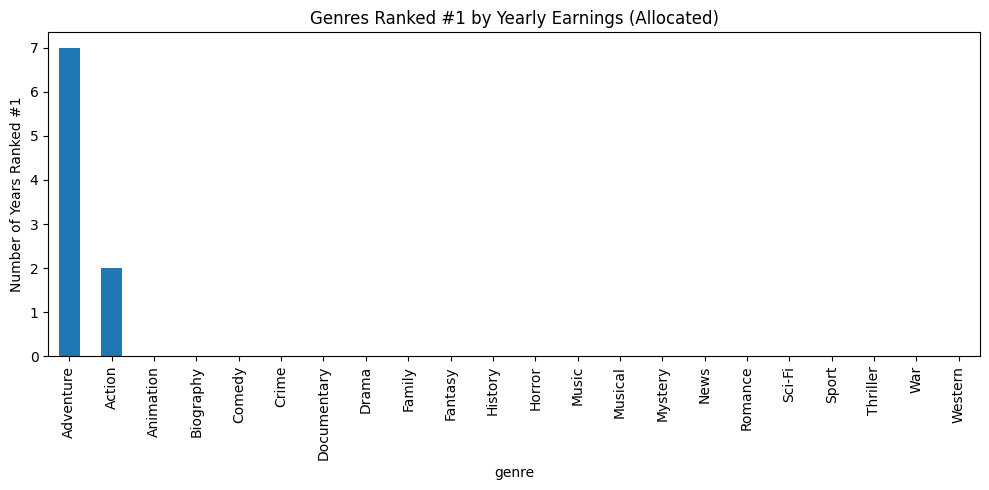

In [ ]:
import matplotlib.pyplot as plt

# Bar plot: number of years each genre ranked #1
rank1_counts = genre_summary.set_index('genre')['years_rank1'].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
rank1_counts.plot(kind='bar')
plt.ylabel('Number of Years Ranked #1')
plt.title('Genres Ranked #1 by Yearly Earnings (Allocated)')
plt.tight_layout()
plt.show()

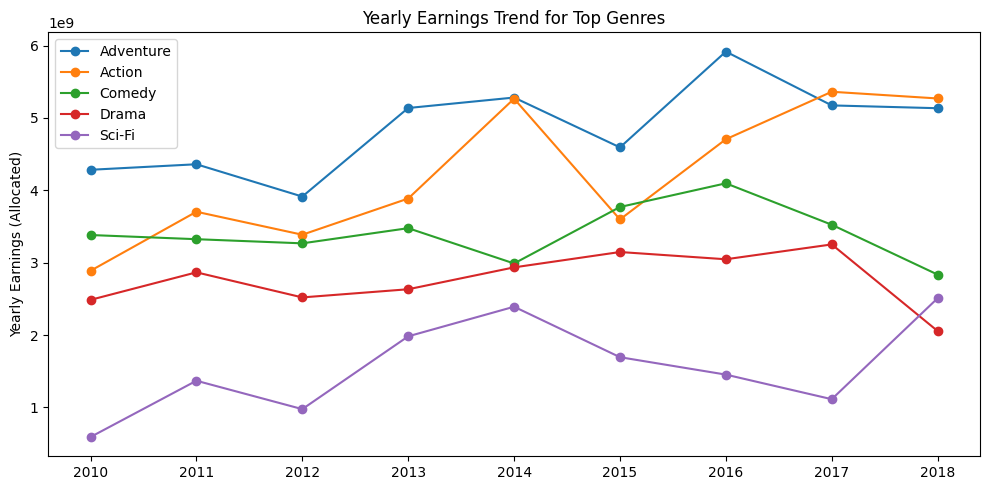

In [ ]:
# Choose a small set of top genres for trend plotting
top_genres_for_trend = genre_summary_sorted['genre'].head(5).tolist()

trend_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_trend)].copy()

plt.figure(figsize=(10, 5))
for g in top_genres_for_trend:
    sub = trend_df[trend_df['genre'] == g].sort_values('year')
    plt.plot(sub['year'], sub['yearly_earnings'], marker='o', label=g)

plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Yearly Earnings Trend for Top Genres')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot: distribution of yearly earnings by genre
# Limit to top genres to keep the plot readable
top_genres_for_box = genre_summary_sorted['genre'].head(10).tolist()
box_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_box)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=box_df, x='genre', y='yearly_earnings')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Distribution of Yearly Earnings for Top Genres')
plt.tight_layout()
plt.show()

NameError: name 'genre_summary_sorted' is not defined

In [ ]:
# Split genres and create one row per (movie, genre)
df_merged = df_merged.dropna(subset=['genres', 'earnings', 'year']).copy()

df_merged['genres_list'] = df_merged['genres'].str.split(',')
df_merged['n_genres'] = df_merged['genres_list'].str.len()

# Explode into long format
df_long = df_merged.explode('genres_list').rename(columns={'genres_list': 'genre'}).copy()

# Allocate earnings to avoid double-counting across genres
df_long['earnings_allocated'] = df_long['earnings'] / df_long['n_genres']

# Basic checks
df_long[['title', 'year', 'genre', 'earnings', 'earnings_allocated']].head()

,title,year,genre,earnings,earnings_allocated
0,Toy Story 3,2010,Adventure,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Animation,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Comedy,1.067000e+09,3.556667e+08
1,Alice in Wonderland (2010),2010,Adventure,1.025500e+09,3.418333e+08
1,Alice in Wonderland (2010),2010,Family,1.025500e+09,3.418333e+08


In [ ]:
# Total yearly earnings per genre (allocated)
yearly_genre_earnings = (
    df_long
    .groupby(['year', 'genre'], as_index=False)['earnings_allocated']
    .sum()
    .rename(columns={'earnings_allocated': 'yearly_earnings'})
)

# Rank genres by yearly earnings within each year (1 = highest)
yearly_genre_earnings['rank'] = yearly_genre_earnings.groupby('year')['yearly_earnings'] \
    .rank(method='dense', ascending=False)

yearly_genre_earnings.sort_values(['year', 'rank']).head(15)

,year,genre,yearly_earnings,rank
1,2010,Adventure,4.283672e+09,1.0
4,2010,Comedy,3.382377e+09,2.0
0,2010,Action,2.888279e+09,3.0
7,2010,Drama,2.486601e+09,4.0
9,2010,Fantasy,2.260501e+09,5.0
2,2010,Animation,1.390600e+09,6.0
8,2010,Family,1.367623e+09,7.0
15,2010,Romance,1.133100e+09,8.0
18,2010,Thriller,1.053738e+09,9.0
14,2010,Mystery,6.583599e+08,10.0


In [ ]:
# Count how many years each genre is ranked #1 and in the top 3
years_rank1 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] == 1]
    .groupby('genre')['year']
    .nunique()
    .rename('years_rank1')
)

years_top3 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] <= 3]
    .groupby('genre')['year']
    .nunique()
    .rename('years_top3')
)

# Mean and standard deviation of yearly earnings per genre
genre_stats = (
    yearly_genre_earnings
    .groupby('genre')['yearly_earnings']
    .agg(mean_yearly='mean', std_yearly='std', years_present='count')
)

# Combine into one summary table
genre_summary = (
    genre_stats
    .join(years_rank1, how='left')
    .join(years_top3, how='left')
    .fillna(0)
    .reset_index()
)

# Coefficient of variation (lower = more stable relative to mean)
genre_summary['cv'] = genre_summary['std_yearly'] / genre_summary['mean_yearly']

# Sort: most #1 years, then most top-3 years, then highest mean
genre_summary_sorted = genre_summary.sort_values(
    ['years_rank1', 'years_top3', 'mean_yearly'],
    ascending=[False, False, False]
)

genre_summary_sorted.head(10)

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,4.865949e+09,6.217830e+08,9,7.0,9.0,0.127782
0,Action,4.229446e+09,9.331527e+08,9,2.0,9.0,0.220632
4,Comedy,3.407434e+09,3.797966e+08,9,0.0,9.0,0.111461
7,Drama,2.771755e+09,3.808734e+08,9,0.0,0.0,0.137412
17,Sci-Fi,1.564857e+09,6.435813e+08,9,0.0,0.0,0.411272
9,Fantasy,1.505560e+09,5.300720e+08,9,0.0,0.0,0.352076
2,Animation,1.459252e+09,3.194802e+08,9,0.0,0.0,0.218934
19,Thriller,1.364252e+09,3.882487e+08,9,0.0,0.0,0.284587
5,Crime,7.626320e+08,3.294899e+08,9,0.0,0.0,0.432043
16,Romance,7.045306e+08,3.022157e+08,9,0.0,0.0,0.428960


In [ ]:
# Identify the most consistent high-earning genres
# Rule of thumb used here:
# - Prioritize years_rank1 and years_top3
# - Prefer high mean_yearly and relatively low cv

top_consistent = genre_summary_sorted.head(8).copy()
top_consistent

,genre,mean_yearly,std_yearly,years_present,years_rank1,years_top3,cv
1,Adventure,4.865949e+09,6.217830e+08,9,7.0,9.0,0.127782
0,Action,4.229446e+09,9.331527e+08,9,2.0,9.0,0.220632
4,Comedy,3.407434e+09,3.797966e+08,9,0.0,9.0,0.111461
7,Drama,2.771755e+09,3.808734e+08,9,0.0,0.0,0.137412
17,Sci-Fi,1.564857e+09,6.435813e+08,9,0.0,0.0,0.411272
9,Fantasy,1.505560e+09,5.300720e+08,9,0.0,0.0,0.352076
2,Animation,1.459252e+09,3.194802e+08,9,0.0,0.0,0.218934
19,Thriller,1.364252e+09,3.882487e+08,9,0.0,0.0,0.284587


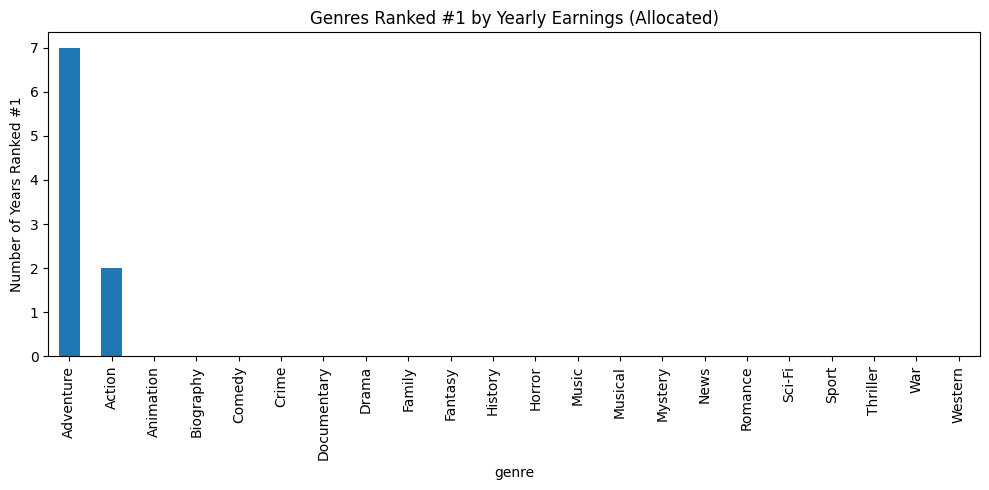

In [ ]:
# Bar plot: number of years each genre ranked #1
rank1_counts = genre_summary.set_index('genre')['years_rank1'].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
rank1_counts.plot(kind='bar')
plt.ylabel('Number of Years Ranked #1')
plt.title('Genres Ranked #1 by Yearly Earnings (Allocated)')
plt.tight_layout()
plt.show()

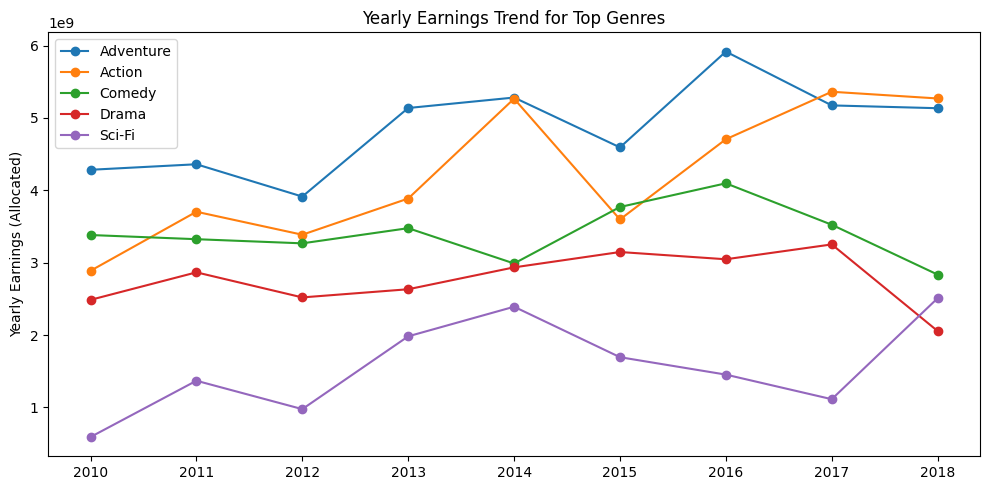

In [ ]:
# Choose a small set of top genres for trend plotting
top_genres_for_trend = genre_summary_sorted['genre'].head(5).tolist()

trend_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_trend)].copy()

plt.figure(figsize=(10, 5))
for g in top_genres_for_trend:
    sub = trend_df[trend_df['genre'] == g].sort_values('year')
    plt.plot(sub['year'], sub['yearly_earnings'], marker='o', label=g)

plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Yearly Earnings Trend for Top Genres')
plt.legend()
plt.tight_layout()
plt.show()

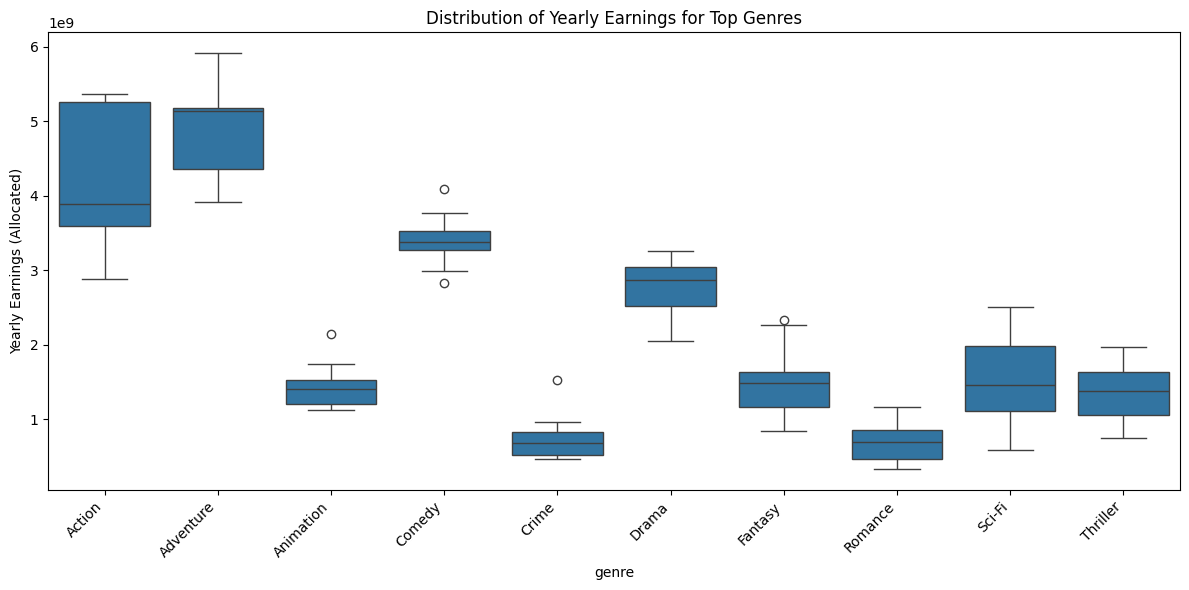

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: distribution of yearly earnings by genre
# Limit to top genres to keep the plot readable
top_genres_for_box = genre_summary_sorted['genre'].head(10).tolist()
box_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_box)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=box_df, x='genre', y='yearly_earnings')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Distribution of Yearly Earnings for Top Genres')
plt.tight_layout()
plt.show()

In [ ]:
# Review the columns number, rows number and column types of the Dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
# Summary of the Raw Data
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## 6. <u>The Numbers</u>

In [ ]:
# Read the tn movie budgets file and display the available columns
df_tn = pd.read_csv('zippedData/zippedData/tn.movie_budgets.csv.gz')
print(df_tn.shape)
print(df_tn.columns)

(5782, 6)
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [ ]:
# Review the columns number, rows number and column types of the Dataset
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# Summary of the Raw Data
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## 7. Data Cleaning

This section cleans the columns needed to answer the business question: **genre**, **year**, and **box office earnings**.

In [ ]:
# Import additional libraries used for cleaning and plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Keep plots readable
sns.set_theme()

### 7.1 Column checks and missing values

The earnings data comes from **Box Office Mojo** (`df_bom`), while genre data comes from **IMDb movie basics** (`df_basics`). These two sources must be merged to connect earnings to genres.

In [ ]:
# Check relevant columns and missing values (Box Office Mojo)
bom_cols = ['title', 'year', 'domestic_gross', 'foreign_gross']
df_bom[bom_cols].isna().sum()

In [ ]:
# Check relevant columns and missing values (IMDb movie basics)
imdb_cols = ['primary_title', 'start_year', 'genres']
df_basics[imdb_cols].isna().sum()

In [ ]:
# Confirm the year coverage in the box office dataset
df_bom['year'].describe()

### 7.2 Clean year and earnings

- Ensures `year` is numeric and usable.
- Ensures earnings fields are numeric.
- Creates one earnings column for analysis.

In [ ]:
# Ensure year is numeric
df_bom['year'] = pd.to_numeric(df_bom['year'], errors='coerce')

# Ensure gross columns are numeric
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')

# Total earnings (domestic + foreign)
df_bom['earnings'] = df_bom[['domestic_gross', 'foreign_gross']].sum(axis=1, min_count=1)

# Keep rows with valid year and earnings
df_bom_clean = df_bom.dropna(subset=['year', 'earnings']).copy()
df_bom_clean['year'] = df_bom_clean['year'].astype(int)

# Reset index after filtering
df_bom_clean = df_bom_clean.reset_index(drop=True)

df_bom_clean[['title', 'year', 'earnings']].head()

### 7.3 Clean IMDb basics

- Ensures `start_year` is numeric.
- Ensures `genres` exists.
- Keeps only the columns needed for merging and genre analysis.

In [61]:




# Ensure start_year is numeric
df_basics['start_year'] = pd.to_numeric(df_basics['start_year'], errors='coerce')

# Keep rows with valid year and genres
df_imdb_clean = df_basics.dropna(subset=['start_year', 'genres', 'primary_title']).copy()
df_imdb_clean['start_year'] = df_imdb_clean['start_year'].astype(int)

# Keep only columns needed downstream
df_imdb_clean = df_imdb_clean[['movie_id', 'primary_title', 'start_year', 'genres']].copy()

# Reset index after filtering
df_imdb_clean = df_imdb_clean.reset_index(drop=True)

df_imdb_clean.head()



NameError: name 'df_basics' is not defined

### 7.4 Create merge keys and merge datasets

To match titles across sources, titles are normalized into a `clean_title` key.

- Removes the trailing year in parentheses (e.g., `"(2010)"`).
- Normalizes punctuation/spaces.
- Uses `clean_title` + `year` as the merge key.

In [ ]:
# Helper function to normalize titles into a merge key
def clean_title(title):
    if pd.isna(title):
        return np.nan

    t = str(title)
    # Remove trailing year in parentheses: "Title (2010)" -> "Title"
    t = re.sub(r"\s*\(\d{4}\)\s*$", "", t)
    # Align common differences
    t = t.replace("&", "and")
    # Keep alphanumeric characters and spaces only
    t = re.sub(r"[^0-9a-zA-Z]+", " ", t)
    # Normalize spacing and case
    t = re.sub(r"\s+", " ", t).strip().lower()
    return t

# Create clean title keys
df_bom_clean['clean_title'] = df_bom_clean['title'].map(clean_title)
df_imdb_clean['clean_title'] = df_imdb_clean['primary_title'].map(clean_title)

# Merge: earnings (BOM) + genres (IMDb)
df_merged = df_bom_clean.merge(
    df_imdb_clean,
    left_on=['clean_title', 'year'],
    right_on=['clean_title', 'start_year'],
    how='inner'
)

# Keep a tidy merged dataset
df_merged = df_merged[['title', 'year', 'earnings', 'movie_id', 'primary_title', 'genres']].copy()

# Reset index after merge
df_merged = df_merged.reset_index(drop=True)

df_merged.head()

,title,year,earnings,movie_id,primary_title,genres
0,Toy Story 3,2010,1.067000e+09,tt0435761,Toy Story 3,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),2010,1.025500e+09,tt1014759,Alice in Wonderland,"Adventure,Family,Fantasy"
2,Alice in Wonderland (2010),2010,1.025500e+09,tt2049386,Alice in Wonderland,"Fantasy,Musical"
3,Harry Potter and the Deathly Hallows Part 1,2010,9.603000e+08,tt0926084,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery"
4,Inception,2010,8.283000e+08,tt1375666,Inception,"Action,Adventure,Sci-Fi"


In [ ]:
# Merge coverage check
bom_rows = df_bom_clean.shape[0]
merged_rows = df_merged.shape[0]
match_rate = merged_rows / bom_rows

pd.DataFrame({
    'dataset': ['df_bom_clean', 'df_merged'],
    'rows': [bom_rows, merged_rows]
}).assign(match_rate_to_bom=[np.nan, match_rate])

,dataset,rows,match_rate_to_bom
0,df_bom_clean,3387,NaN
1,df_merged,2210,0.652495


## 8. Analysis: Which Genre Consistently Earns the Most?

**Definition used here:** a genre is “consistent” if it ranks #1 (or among the top) in most years and its yearly earnings are high with relatively low variance.

**Important note on multi-genre movies:** IMDb genres are multi-label (a movie can belong to multiple genres). If earnings are summed across genres without adjustment, multi-genre movies get counted multiple times. To avoid this, this analysis allocates each movie’s earnings equally across its genres (e.g., a 3-genre movie contributes 1/3 of its earnings to each genre).

In [ ]:
# Split genres and create one row per (movie, genre)
df_merged = df_merged.dropna(subset=['genres', 'earnings', 'year']).copy()

df_merged['genres_list'] = df_merged['genres'].str.split(',')
df_merged['n_genres'] = df_merged['genres_list'].str.len()

# Explode into long format
df_long = df_merged.explode('genres_list').rename(columns={'genres_list': 'genre'}).copy()

# Allocate earnings to avoid double-counting across genres
df_long['earnings_allocated'] = df_long['earnings'] / df_long['n_genres']

# Basic checks
df_long[['title', 'year', 'genre', 'earnings', 'earnings_allocated']].head()

,title,year,genre,earnings,earnings_allocated
0,Toy Story 3,2010,Adventure,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Animation,1.067000e+09,3.556667e+08
0,Toy Story 3,2010,Comedy,1.067000e+09,3.556667e+08
1,Alice in Wonderland (2010),2010,Adventure,1.025500e+09,3.418333e+08
1,Alice in Wonderland (2010),2010,Family,1.025500e+09,3.418333e+08


In [ ]:
%%time
# Total yearly earnings per genre (allocated)
yearly_genre_earnings = (
    df_long
    .groupby(['year', 'genre'], as_index=False)['earnings_allocated']
    .sum()
    .rename(columns={'earnings_allocated': 'yearly_earnings'})
)

# Rank genres by yearly earnings within each year (1 = highest)
yearly_genre_earnings['rank'] = yearly_genre_earnings.groupby('year')['yearly_earnings'] \
    .rank(method='dense', ascending=False)

yearly_genre_earnings.sort_values(['year', 'rank']).head(15)

NameError: name 'df_long' is not defined

In [ ]:
# Count how many years each genre is ranked #1 and in the top 3
years_rank1 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] == 1]
    .groupby('genre')['year']
    .nunique()
    .rename('years_rank1')
)

years_top3 = (
    yearly_genre_earnings[yearly_genre_earnings['rank'] <= 3]
    .groupby('genre')['year']
    .nunique()
    .rename('years_top3')
)

# Mean and standard deviation of yearly earnings per genre
genre_stats = (
    yearly_genre_earnings
    .groupby('genre')['yearly_earnings']
    .agg(mean_yearly='mean', std_yearly='std', years_present='count')
)

# Combine into one summary table
genre_summary = (
    genre_stats
    .join(years_rank1, how='left')
    .join(years_top3, how='left')
    .fillna(0)
    .reset_index()
)

# Coefficient of variation (lower = more stable relative to mean)
genre_summary['cv'] = genre_summary['std_yearly'] / genre_summary['mean_yearly']

# Sort: most #1 years, then most top-3 years, then highest mean
genre_summary_sorted = genre_summary.sort_values(
    ['years_rank1', 'years_top3', 'mean_yearly'],
    ascending=[False, False, False]
)

genre_summary_sorted.head(10)

NameError: name 'yearly_genre_earnings' is not defined

In [ ]:
# Identify the most consistent high-earning genres
# Rule of thumb used here:
# - Prioritize years_rank1 and years_top3
# - Prefer high mean_yearly and relatively low cv

top_consistent = genre_summary_sorted.head(8).copy()
top_consistent



NameError: name 'genre_summary_sorted' is not defined

### 8.1 Visualization: Years ranked #1 by genre

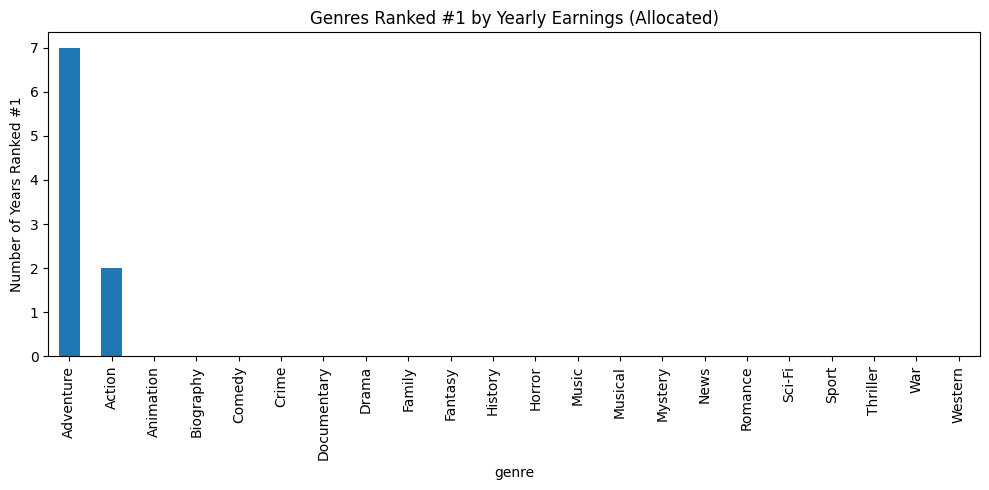

In [ ]:
# Bar plot: number of years each genre ranked #1
rank1_counts = genre_summary.set_index('genre')['years_rank1'].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
rank1_counts.plot(kind='bar')
plt.ylabel('Number of Years Ranked #1')
plt.title('Genres Ranked #1 by Yearly Earnings (Allocated)')
plt.tight_layout()
plt.show()

### 8.2 Visualization: Yearly earnings trend for top genres

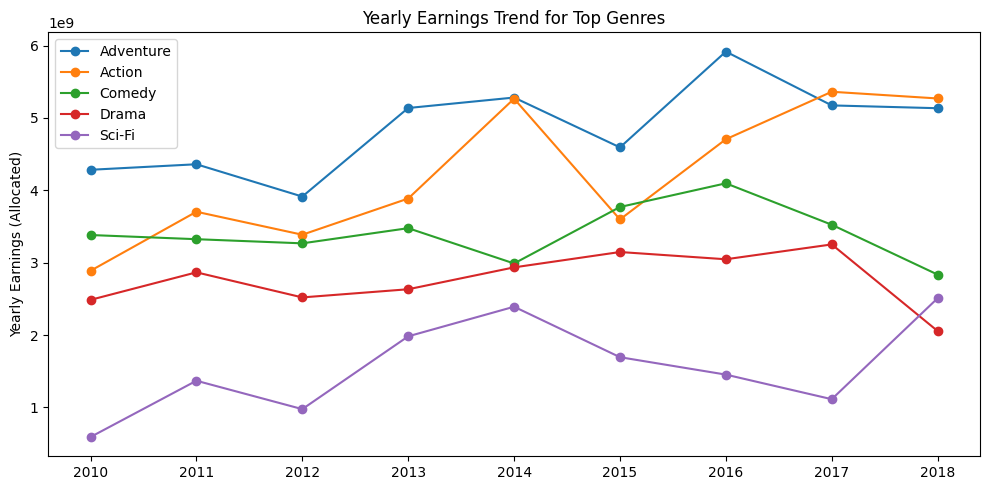

In [ ]:
# Choose a small set of top genres for trend plotting
top_genres_for_trend = genre_summary_sorted['genre'].head(5).tolist()

trend_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_trend)].copy()

plt.figure(figsize=(10, 5))
for g in top_genres_for_trend:
    sub = trend_df[trend_df['genre'] == g].sort_values('year')
    plt.plot(sub['year'], sub['yearly_earnings'], marker='o', label=g)

plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Yearly Earnings Trend for Top Genres')
plt.legend()
plt.tight_layout()
plt.show()

### 8.3 Visualization: Distribution of yearly earnings by genre

In [ ]:
# Boxplot: distribution of yearly earnings by genre
# Limit to top genres to keep the plot readable
top_genres_for_box = genre_summary_sorted['genre'].head(10).tolist()
box_df = yearly_genre_earnings[yearly_genre_earnings['genre'].isin(top_genres_for_box)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=box_df, x='genre', y='yearly_earnings')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Yearly Earnings (Allocated)')
plt.title('Distribution of Yearly Earnings for Top Genres')
plt.tight_layout()
plt.show()

NameError: name 'genre_summary_sorted' is not defined